<a href="https://colab.research.google.com/github/DAN-BIWOTT/Machine-learning-in-finance/blob/main/MLP_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [134]:
#Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random

import tensorflow as tf
from tensorflow import keras

In [135]:
#Reading dataset
df_2023_Ask = pd.read_csv('XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv')
df_2023_Bid = pd.read_csv('XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv')

In [136]:
#Check if Ask Dataset is alright
print(df_2023_Ask.head(3))
print(df_2023_Ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [137]:
#Check if Bid dataset is alright
print(df_2023_Bid.head(3))
print(df_2023_Bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [138]:
#Check if there is non numerical value in the Ask dataset
df_2023_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [139]:
#Check if there is non numerical value in the Bid dataset
df_2023_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [140]:
#Merge the Ask and Bid Dataset by the Timeline
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [141]:
#Now clear the memory and look at the merged file
df_2023_Ask = []
df_2023_Bid = []
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [142]:
#Rename the columns so that they make sense
df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [143]:
df_2023.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882


In [144]:
df_2023.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200


In [145]:
# Create a variable called df[] to keep the necessary column Spreads and also keeps us from messing around with the original dataset.
df = df_2023.copy()

In [146]:
# Now we get the difference between the Asks and Bids which become our Spreads.
df["Volume_Spread"] = df_2023["Volume_Ask"] - df_2023["Volume_Bid"]
df["Volume_Absolute_Spread"] = (df_2023["Volume_Ask"] - df_2023["Volume_Bid"]).abs()
df["Open_Spread"] = df_2023["Open_Ask"]  - df_2023["Open_Bid"]
df["High_Spread"] = df_2023["High_Ask"]  - df_2023["High_Bid"]
df["Low_Spread"]  = df_2023["Low_Ask"]   - df_2023["Low_Bid"]
df["Close_Spread"]= df_2023["Close_Ask"] - df_2023["Close_Bid"]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Local time              35220 non-null  object 
 1   Open_Bid                35220 non-null  float64
 2   High_Bid                35220 non-null  float64
 3   Low_Bid                 35220 non-null  float64
 4   Close_Bid               35220 non-null  float64
 5   Volume_Bid              35220 non-null  float64
 6   Open_Ask                35220 non-null  float64
 7   High_Ask                35220 non-null  float64
 8   Low_Ask                 35220 non-null  float64
 9   Close_Ask               35220 non-null  float64
 10  Volume_Ask              35220 non-null  float64
 11  Volume_Spread           35220 non-null  float64
 12  Volume_Absolute_Spread  35220 non-null  float64
 13  Open_Spread             35220 non-null  float64
 14  High_Spread             35220 non-null

In [148]:
# Don't NORMALIZE HERE. I know its tempting but we can't normalize data that we haven't yet divided into training, validation and testing sets.


In [149]:
df.shape

(35220, 17)

In [150]:
# Now fix the Time problem. It's currently an Object and we want it as a numerical value
import datetime

df['Local_time_T'] = pd.to_datetime(df['Local time'], utc=True)
df = df.drop(['Local time'],axis=1)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Open_Bid                35220 non-null  float64            
 1   High_Bid                35220 non-null  float64            
 2   Low_Bid                 35220 non-null  float64            
 3   Close_Bid               35220 non-null  float64            
 4   Volume_Bid              35220 non-null  float64            
 5   Open_Ask                35220 non-null  float64            
 6   High_Ask                35220 non-null  float64            
 7   Low_Ask                 35220 non-null  float64            
 8   Close_Ask               35220 non-null  float64            
 9   Volume_Ask              35220 non-null  float64            
 10  Volume_Spread           35220 non-null  float64            
 11  Volume_Absolute_Spread  35220 non-null  f

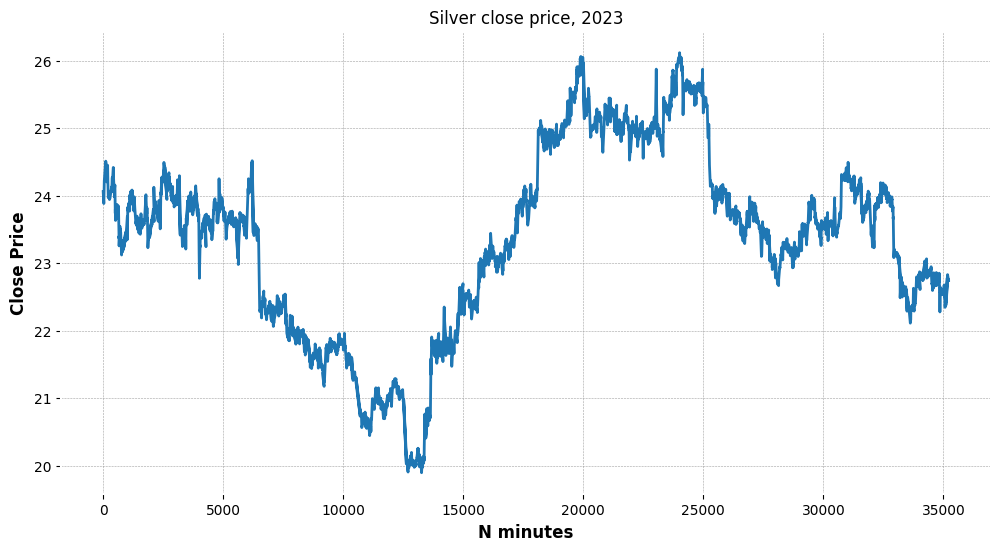

In [152]:
# Line Chart:
# This line chart displays the closing bid price of SILVER over time, giving a general overview of the price trend.
plt.figure(figsize=(12,6))
plt.plot(df['Close_Bid'])
plt.title('Silver close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

In [153]:
# Candle Sticks
# Make a copy of the data set and drop the columns listed on the new dataset.
# Prepare the data for the candlesticks.
data_chart = df.set_index('Local_time_T', inplace=False)
data_chart = data_chart.drop(['Volume_Ask','Open_Spread', 'High_Spread', 'Low_Spread', 'Close_Spread'],axis=1)

In [23]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.6 MB/s eta 0:00:00


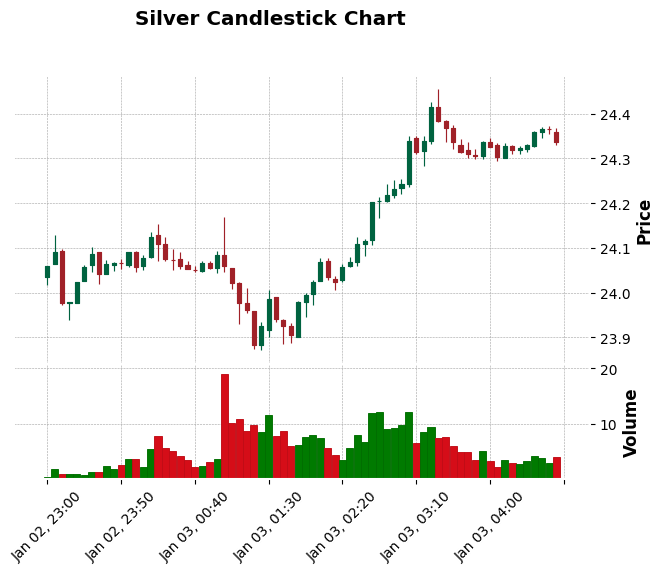

In [154]:
import mplfinance as mpf

data_chart_candle = data_chart[['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid']]
data_chart_candle.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
# We are using a slice of the data set, the first 70 minutes that is.
mpf.plot(data_chart_candle.iloc[0:70], type='candle', style='charles', title='Silver Candlestick Chart', volume=True)

In [155]:
# Clear memory, we don't need it anymore
data_chart = []

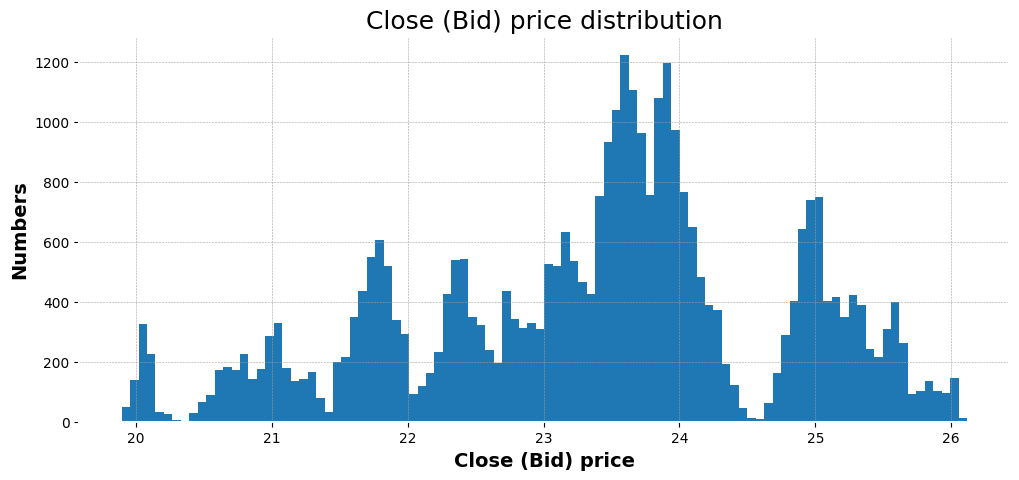

In [156]:
# Histograms are used to visualize the distribution of data points. Here we'll do close bid prices and trading volumes.
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);

In [27]:
# Kernel Density Estimation (KDE) Plot:
# A KDE plot provides a smoother representation of the data distribution compared to a histogram. We use it to estimate the probability density function of the close bid price.

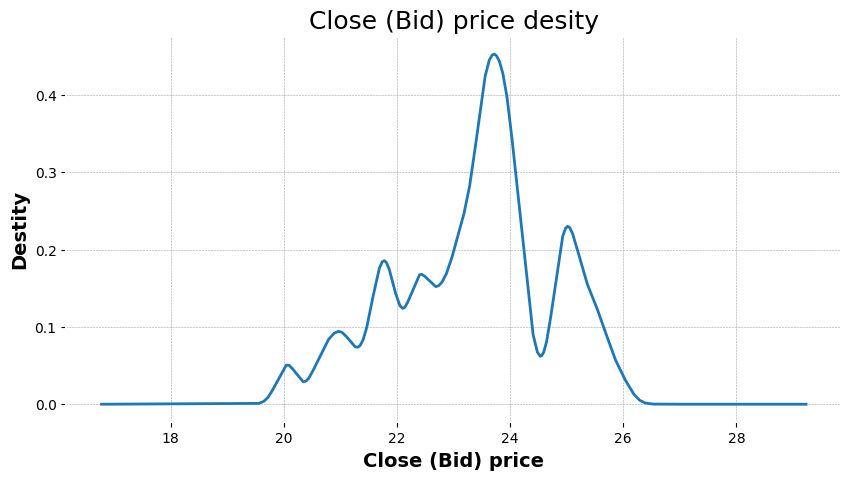

In [157]:
plt.figure(num=1,figsize=(10,5))
df['Close_Bid'].plot.kde()
plt.title('Close (Bid) price desity',size=18)
plt.ylabel('Destity',size=14)
plt.xlabel('Close (Bid) price',size=14);

In [29]:
# Scatter plots are used to visualize the relationship between two variables.
# This plot shows the relationship between the bid and ask volumes for trades exceeding a certain threshold

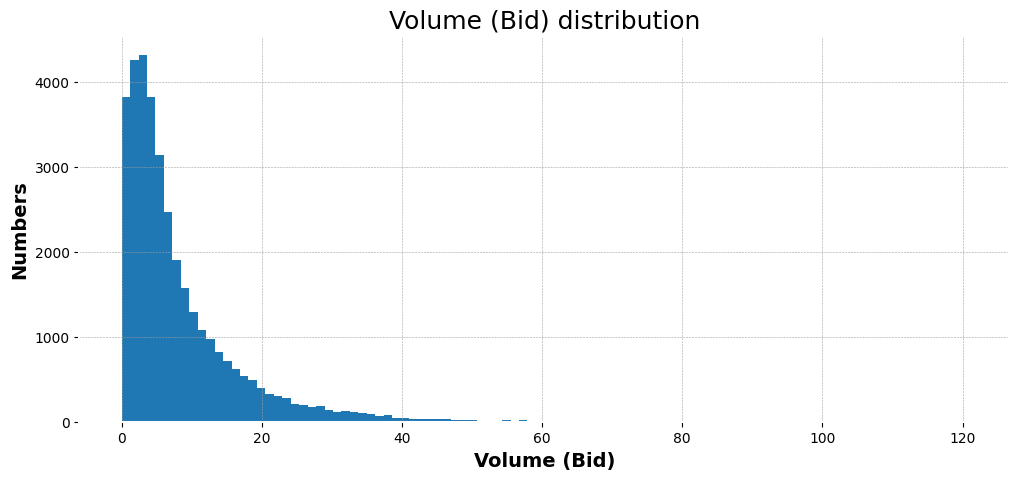

In [158]:
# Before that, lets understand the Volume distribution
# Volume is important because it tells us the interest traders are showing towards an ask or bid
# Below is the Volume distribution on the bids
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Volume_Bid'], bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

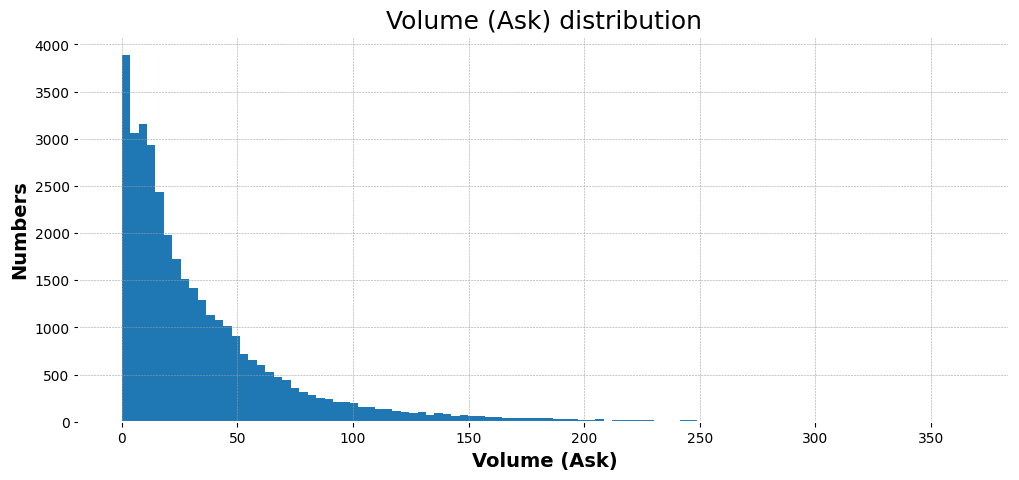

In [160]:
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Volume_Ask'], bins=100)
plt.title('Volume (Ask) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Ask)',size=14);

In [161]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


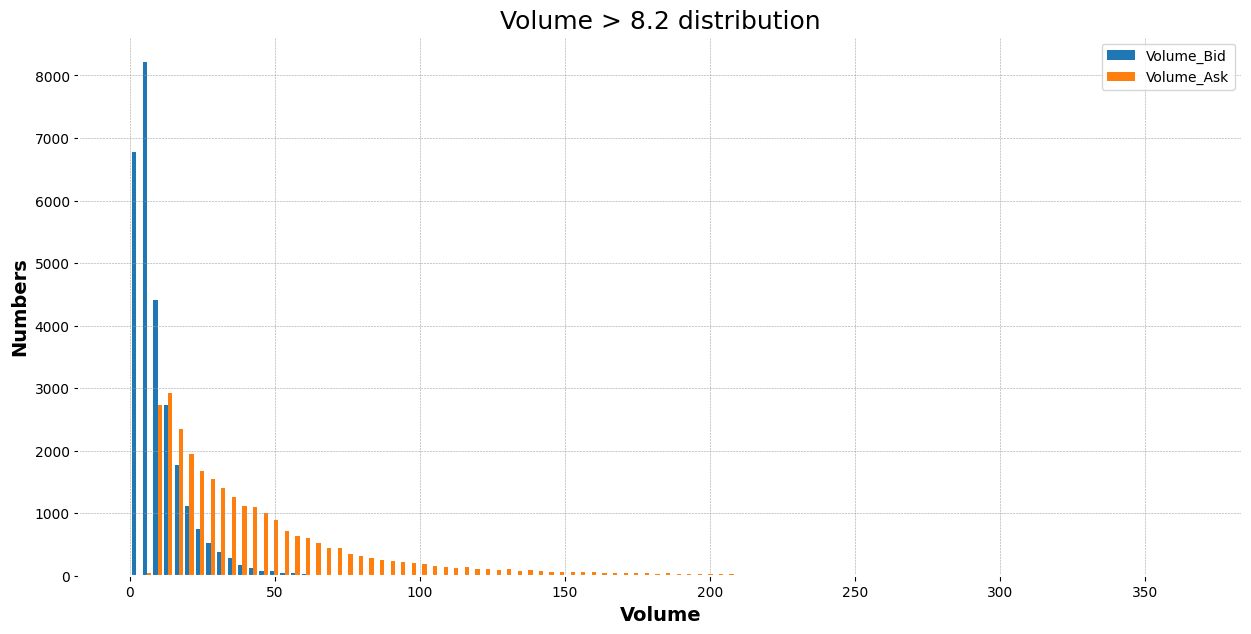

In [162]:
vol_350k = df[ (df['Volume_Bid'] > 8.2 ) | (df['Volume_Ask'] > 8.2) ]

plt.figure(num=1,figsize=(15,7))
plt.hist(vol_350k[['Volume_Bid', 'Volume_Ask']], bins=100)
plt.legend(['Volume_Bid', 'Volume_Ask'])
plt.title('Volume > 8.2 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume',size=14);

In [163]:
# Higher bid volumes means that buyers are eager to get the asset and coincidentally driving the price up

<Axes: xlabel='Volume_Bid', ylabel='Volume_Ask'>

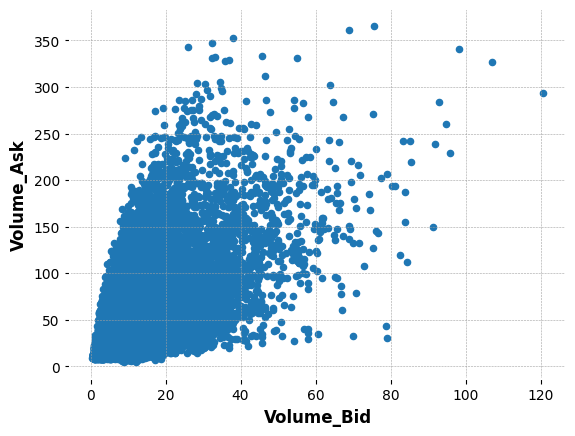

In [164]:
vol_350k.plot.scatter(x='Volume_Bid', y='Volume_Ask')

In [36]:
pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00


In [37]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [165]:
# Interactive Plots: I prefer these
import cufflinks as cf
cf.go_offline()

vol_350k[['Volume_Ask', 'Volume_Bid']].iplot(
                            kind='hist',
                            histnorm='percent',
                            barmode='overlay',
                            xTitle='Volume > 0.82 distribution',
                            yTitle='Numbers',
                            title='Volume')

In [166]:
df.iloc[19800:20200,:][['High_Bid', 'Low_Bid', 'Local_time_T', 'Volume_Ask','Volume_Bid']].iplot(
                                                x='Local_time_T', y=['High_Bid', 'Low_Bid'],
                                                mode='lines+markers',
                                                xTitle='Date', yTitle='Price',
                                                title='SILVER ')

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [167]:
# Lets fix our time problem. We have weekends included in the data that will mess with the model's predictions.
# So we shift the copied date columns down by one and then subtract to get the large blanks.
df['Local_time_T_shift_1_Down'] = df['Local_time_T'].shift(1)
df["Local_time_T_Delta"] = df["Local_time_T"] - df["Local_time_T_shift_1_Down"]

In [168]:
df.head(-5)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,Local_time_T,Local_time_T_shift_1_Down,Local_time_T_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,NaT
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048,2023-01-02 23:15:00+00:00,2023-01-02 23:10:00+00:00,0 days 00:05:00
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050,2023-01-02 23:20:00+00:00,2023-01-02 23:15:00+00:00,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35210,22.758,22.760,22.742,22.743,3.7139,22.788,22.790,22.772,22.773,6.3546,2.6407,2.6407,0.030,0.030,0.030,0.030,2023-06-30 20:10:00+00:00,2023-06-30 20:05:00+00:00,0 days 00:05:00
35211,22.746,22.753,22.738,22.748,1.0326,22.776,22.783,22.768,22.778,2.3477,1.3151,1.3151,0.030,0.030,0.030,0.030,2023-06-30 20:15:00+00:00,2023-06-30 20:10:00+00:00,0 days 00:05:00
35212,22.742,22.753,22.738,22.748,1.7904,22.772,22.783,22.768,22.778,4.5415,2.7511,2.7511,0.030,0.030,0.030,0.030,2023-06-30 20:20:00+00:00,2023-06-30 20:15:00+00:00,0 days 00:05:00
35213,22.733,22.747,22.728,22.742,1.9267,22.763,22.777,22.758,22.772,3.4873,1.5606,1.5606,0.030,0.030,0.030,0.030,2023-06-30 20:25:00+00:00,2023-06-30 20:20:00+00:00,0 days 00:05:00


In [169]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).
df['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
df['Local_time_T_Delta'].iloc[0]

<ipython-input-169-aebb36525791>:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Timedelta('2 days 01:01:00')

In [170]:
df.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,Local_time_T,Local_time_T_shift_1_Down,Local_time_T_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,2 days 01:01:00
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00


In [172]:
df[['Local_time_T_Delta']][df["Local_time_T_Delta"] > '0 days 01:00:00'].value_counts(sort=False)

,count
Local_time_T_Delta,
0 days 01:05:00,99
0 days 03:35:00,2
0 days 05:05:00,1
2 days 00:05:00,1
2 days 01:01:00,1
2 days 01:05:00,23
3 days 01:05:00,1


In [173]:
# New days
new_day = df[df["Local_time_T_Delta"] > '0 days 01:00:00']

In [174]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

,count
Local_time_T_Delta,
2 days 01:01:00,1
0 days 01:05:00,99
2 days 01:05:00,23
0 days 05:05:00,1
2 days 00:05:00,1
3 days 01:05:00,1
0 days 03:35:00,2


In [176]:
# The weekends
df[['Local_time_T_Delta']][df['Local_time_T_Delta'] > '1 days 00:00:00'].value_counts(sort=False)

,count
Local_time_T_Delta,
2 days 00:05:00,1
2 days 01:01:00,1
2 days 01:05:00,23
3 days 01:05:00,1


In [178]:
# New weeks
new_week = df[df["Local_time_T_Delta"] > '1 days 00:00:00']

In [179]:
new_week['Local_time_T_Delta'].value_counts(sort=False)

,count
Local_time_T_Delta,
2 days 01:01:00,1
2 days 01:05:00,23
2 days 00:05:00,1
3 days 01:05:00,1


In [180]:
df['New_day'] = 0
df['New_week'] = 0

In [184]:
df.loc[df["Local_time_T_Delta"] > '0 days 00:01:00', "New_day"] = 1

In [185]:
df[df["New_day"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,Local_time_T,Local_time_T_shift_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,...,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,2 days 01:01:00,1,0
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,...,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00,1,0
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,...,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00,1,0
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,...,0.0000,0.049,0.048,0.048,0.048,2023-01-02 23:15:00+00:00,2023-01-02 23:10:00+00:00,0 days 00:05:00,1,0
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,...,0.0164,0.048,0.049,0.047,0.050,2023-01-02 23:20:00+00:00,2023-01-02 23:15:00+00:00,0 days 00:05:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35215,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002,...,1.5250,0.030,0.030,0.030,0.030,2023-06-30 20:35:00+00:00,2023-06-30 20:30:00+00:00,0 days 00:05:00,1,0
35216,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568,...,0.6158,0.039,0.030,0.039,0.030,2023-06-30 20:40:00+00:00,2023-06-30 20:35:00+00:00,0 days 00:05:00,1,0
35217,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212,...,0.3522,0.030,0.030,0.030,0.030,2023-06-30 20:45:00+00:00,2023-06-30 20:40:00+00:00,0 days 00:05:00,1,0
35218,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836,...,0.4676,0.030,0.036,0.038,0.030,2023-06-30 20:50:00+00:00,2023-06-30 20:45:00+00:00,0 days 00:05:00,1,0


In [53]:
df.loc[df["Local_time_T_Delta"] > '1 days 00:00:00', "New_week"] = 1

In [54]:
df[df["New_week"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,Local_time_T,Local_time_T_shift_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.34800,24.102,24.125,24.083,24.125,0.35100,...,0.00300,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,2 days 01:01:00,1,1
1104,23.860,23.891,23.809,23.871,2.87340,23.914,23.921,23.863,23.901,20.22160,...,17.34820,0.054,0.030,0.054,0.030,2023-01-08 23:00:00+00:00,2023-01-06 21:55:00+00:00,2 days 01:05:00,1,1
2484,24.246,24.258,24.209,24.209,0.75000,24.314,24.317,24.262,24.266,0.75000,...,0.00000,0.068,0.059,0.053,0.057,2023-01-15 23:00:00+00:00,2023-01-13 21:55:00+00:00,2 days 01:05:00,1,1
3816,23.897,23.989,23.872,23.929,2.04890,23.967,24.015,23.942,23.959,3.06595,...,1.01705,0.070,0.026,0.070,0.030,2023-01-22 23:00:00+00:00,2023-01-20 21:55:00+00:00,2 days 01:05:00,1,1
5196,23.534,23.602,23.534,23.576,3.03920,23.596,23.632,23.588,23.606,15.37420,...,12.33500,0.062,0.030,0.054,0.030,2023-01-29 23:00:00+00:00,2023-01-27 21:55:00+00:00,2 days 01:05:00,1,1
6576,22.251,22.299,22.217,22.292,2.89340,22.294,22.329,22.254,22.322,16.70575,...,13.81235,0.043,0.030,0.037,0.030,2023-02-05 23:00:00+00:00,2023-02-03 21:55:00+00:00,2 days 01:05:00,1,1
7956,21.965,22.017,21.962,21.983,1.81030,22.055,22.055,22.002,22.013,6.03730,...,4.22700,0.090,0.038,0.040,0.030,2023-02-12 23:00:00+00:00,2023-02-10 21:55:00+00:00,2 days 01:05:00,1,1
9336,21.657,21.718,21.637,21.701,0.99730,21.722,21.752,21.685,21.731,1.47365,...,0.47635,0.065,0.034,0.048,0.030,2023-02-19 23:00:00+00:00,2023-02-17 21:55:00+00:00,2 days 01:05:00,1,1
10716,20.749,20.825,20.705,20.789,1.73046,20.847,20.856,20.787,20.819,1.71218,...,0.01828,0.098,0.031,0.082,0.030,2023-02-26 23:00:00+00:00,2023-02-24 21:55:00+00:00,2 days 01:05:00,1,1
12096,21.224,21.239,21.174,21.197,4.03290,21.306,21.306,21.204,21.227,13.49775,...,9.46485,0.082,0.067,0.030,0.030,2023-03-05 23:00:00+00:00,2023-03-03 21:55:00+00:00,2 days 01:05:00,1,1


In [186]:
# drop the columns that are no longer needed, they only existed to help us do the math
# since the time series is regular
# (each line is the next minute, except for the marked lines in the New_day and New_week columns

data = df.drop(['Local_time_T', 'Local_time_T_shift_1_Down', 'Local_time_T_Delta'],axis=1)

In [187]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066,1,0
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049,1,0
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050,1,0
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048,1,0
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050,1,0


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open_Bid                35220 non-null  float64
 1   High_Bid                35220 non-null  float64
 2   Low_Bid                 35220 non-null  float64
 3   Close_Bid               35220 non-null  float64
 4   Volume_Bid              35220 non-null  float64
 5   Open_Ask                35220 non-null  float64
 6   High_Ask                35220 non-null  float64
 7   Low_Ask                 35220 non-null  float64
 8   Close_Ask               35220 non-null  float64
 9   Volume_Ask              35220 non-null  float64
 10  Volume_Spread           35220 non-null  float64
 11  Volume_Absolute_Spread  35220 non-null  float64
 12  Open_Spread             35220 non-null  float64
 13  High_Spread             35220 non-null  float64
 14  Low_Spread              35220 non-null

In [189]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Spread']

In [190]:
data.tail(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,New_day,New_week,Y_High_Bid,Y_Low_Ask
35217,22.751,22.751,22.746,22.746,0.069,22.781,22.781,22.776,22.776,0.4212,0.3522,0.3522,0.03,0.030,0.030,0.030,1,0,22.751,22.776
35218,22.746,22.761,22.736,22.756,0.216,22.776,22.797,22.774,22.786,0.6836,0.4676,0.4676,0.03,0.036,0.038,0.030,1,0,22.761,22.774
35219,22.756,22.766,22.701,22.745,0.327,22.786,22.811,22.786,22.811,0.3712,0.0442,0.0442,0.03,0.045,0.085,0.066,1,0,22.766,22.786


In [191]:
#                                                   DIVIDING DATA INTO TRAINING AND TESTING

In [225]:
data_length = data.shape[0]
data_length

35220

In [226]:
train_size = int(round(data_length * 0.8, -3))
train_size

28000

In [227]:
test_size = data_length - train_size
test_size

7220

In [228]:
train = data.iloc[:train_size]
train.shape

(28000, 20)

In [229]:
test = data.iloc[train_size:]
test.shape

(7220, 20)

In [230]:
train.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,New_day,New_week,Y_High_Bid,Y_Low_Ask
27998,23.049,23.091,23.049,23.067,4.7839,23.079,23.121,23.079,23.097,34.8313,30.0474,30.0474,0.03,0.03,0.03,0.03,1,0,23.091,23.079
27999,23.074,23.080,23.029,23.039,5.0757,23.104,23.110,23.059,23.069,27.9602,22.8845,22.8845,0.03,0.03,0.03,0.03,1,0,23.080,23.059


In [231]:
# We'll start normalization.
# We can use two kinds, the simple way is just dividing everything by 10

# columns_to_normalize = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid',
#                         'Volume_Bid', 'Open_Ask', 'High_Ask', 'Low_Ask',
#                         'Close_Ask', 'Volume_Ask', 'Volume_Spread',
#                         'Volume_Absolute_Spread', 'Open_Spread', 'High_Spread',
#                         'Low_Spread']

# # Normalize the selected columns by dividing by 10
# for column in columns_to_normalize:
#   df[column] = df[column] / 10

# df.head()

In [232]:
# The other more complicated method is shown below

# Max price is Max High_Ask = High_Bid + High_Delta This is what a buyer was POTENTIALLY willing to pay.
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

max_price = ( train['High_Bid'] + train['High_Spread']).max()
max_price

26.153

In [233]:
min_price = train['Low_Bid'].min()
min_price

19.888

In [234]:
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

365.6322

In [235]:
max_Spread = max(max(train['Open_Spread']), max(train['High_Spread']), max(train['Low_Spread']), max(train['Close_Spread']))
max_Spread

0.30900000000000105

In [236]:
max_Spread = round(max_Spread, 3)
max_Spread

0.309

In [237]:
min_Spread = min(min(train['Open_Spread']), min(train['High_Spread']), min(train['Low_Spread']), min(train['Close_Spread']))
min_Spread

0.0009999999999976694

In [238]:
min_Spread = round(min_Spread, 3)
min_Spread

0.001

In [239]:
max_volume_Spread = train['Volume_Spread'].max()
max_volume_Spread

317.5858

In [240]:

min_volume_Spread = train['Volume_Spread'].min()
min_volume_Spread

-48.7912

In [241]:
max_volume_Absolute_Spread = train['Volume_Absolute_Spread'].max()
max_volume_Absolute_Spread

317.5858

In [242]:
min_volume_Absolute_Spread = train['Volume_Absolute_Spread'].min()
min_volume_Absolute_Spread

0.0

In [243]:
# Apply feature scaling to the 'train' DataFrame
train['Open_Bid'] = ( train['Open_Bid'] - min_price ) / (max_price-min_price)
train['High_Bid']  = ( train['High_Bid']  - min_price ) / (max_price-min_price)
train['Low_Bid']   = ( train['Low_Bid']   - min_price ) / (max_price-min_price)
train['Close_Bid'] = ( train['Close_Bid'] - min_price ) / (max_price-min_price)
train['Y_High_Bid'] = ( train['Y_High_Bid'] - min_price ) / (max_price-min_price)
train['Y_Low_Ask']  = ( train['Y_Low_Ask']  - min_price ) / (max_price-min_price)

train['Volume_Ask']  = train['Volume_Ask'] / max_volume
train['Volume_Bid']  = train['Volume_Bid'] / max_volume

train['Volume_Spread'] = ( train['Volume_Spread'] - min_volume_Spread ) / (max_volume_Spread-min_volume_Spread)

train['Volume_Absolute_Spread']  = train['Volume_Absolute_Spread'] / max_volume_Absolute_Spread

train['Open_Spread']  = ( max_Spread - train['Open_Spread'] )  / (max_Spread-min_Spread)
train['High_Spread']  = ( max_Spread - train['High_Spread'] )  / (max_Spread-min_Spread)

# Apply feature scaling to the 'test' DataFrame using the training set's parameters
test['Open_Bid'] = (test['Open_Bid'] - min_price) / (max_price - min_price)
test['High_Bid'] = (test['High_Bid'] - min_price) / (max_price - min_price)
test['Low_Bid'] = (test['Low_Bid'] - min_price) / (max_price - min_price)
test['Close_Bid'] = (test['Close_Bid'] - min_price) / (max_price - min_price)
test['Y_High_Bid'] = (test['Y_High_Bid'] - min_price) / (max_price - min_price)
test['Y_Low_Ask'] = (test['Y_Low_Ask'] - min_price) / (max_price - min_price)

test['Volume_Ask'] = test['Volume_Ask'] / max_volume
test['Volume_Bid'] = test['Volume_Bid'] / max_volume

test['Volume_Spread'] = (test['Volume_Spread'] - min_volume_Spread) / (
    max_volume_Spread - min_volume_Spread
)

test['Volume_Absolute_Spread'] = test['Volume_Absolute_Spread'] / max_volume_Absolute_Spread

test['Open_Spread'] = (max_Spread - test['Open_Spread']) / (max_Spread - min_Spread)
test['High_Spread'] = (max_Spread - test['High_Spread']) / (max_Spread - min_Spread)


In [244]:
train.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,24.102,24.125,24.083,24.125,0.000960,0.133180,0.000009,0.788961,0.788961,0.066,0.066,1,0,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671030,0.005048,24.094,24.188,24.094,24.141,0.003159,0.131287,0.002175,0.905844,0.814935,0.030,0.049,1,0,0.677095,0.671349
2,0.671349,0.671987,0.651875,0.652674,0.002470,24.143,24.148,24.022,24.027,0.002412,0.133115,0.000066,0.844156,0.840909,0.050,0.050,1,0,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,24.026,24.028,23.986,24.028,0.002445,0.133172,0.000000,0.844156,0.847403,0.048,0.048,1,0,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,24.026,24.073,24.023,24.073,0.002474,0.133217,0.000052,0.847403,0.844156,0.047,0.050,1,0,0.660176,0.660016


In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open_Bid                28000 non-null  float64
 1   High_Bid                28000 non-null  float64
 2   Low_Bid                 28000 non-null  float64
 3   Close_Bid               28000 non-null  float64
 4   Volume_Bid              28000 non-null  float64
 5   Open_Ask                28000 non-null  float64
 6   High_Ask                28000 non-null  float64
 7   Low_Ask                 28000 non-null  float64
 8   Close_Ask               28000 non-null  float64
 9   Volume_Ask              28000 non-null  float64
 10  Volume_Spread           28000 non-null  float64
 11  Volume_Absolute_Spread  28000 non-null  float64
 12  Open_Spread             28000 non-null  float64
 13  High_Spread             28000 non-null  float64
 14  Low_Spread              28000 non-null

In [246]:
test.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Spread,Volume_Absolute_Spread,Open_Spread,High_Spread,Low_Spread,Close_Spread,New_day,New_week,Y_High_Bid,Y_Low_Ask
28000,0.504549,0.505347,0.498005,0.504549,0.028595,23.079,23.084,23.038,23.079,0.147802,0.252137,0.137242,0.905844,0.905844,0.030,0.030,1,0,0.505347,0.502793
28001,0.504868,0.507103,0.498962,0.498962,0.016730,23.081,23.095,23.045,23.046,0.075782,0.192105,0.067986,0.905844,0.905844,0.031,0.032,1,0,0.507103,0.503911
28002,0.498803,0.501197,0.479489,0.480766,0.081299,23.044,23.058,22.922,22.930,0.255110,0.306630,0.200107,0.902597,0.905844,0.030,0.030,1,0,0.501197,0.484278
28003,0.481405,0.481405,0.461293,0.463687,0.069359,22.934,22.934,22.808,22.823,0.215015,0.278532,0.167691,0.905844,0.905844,0.030,0.030,1,0,0.481405,0.466081
28004,0.463687,0.467997,0.457143,0.461612,0.054024,22.823,22.850,22.782,22.810,0.195321,0.274181,0.162673,0.905844,0.905844,0.030,0.030,1,0,0.467997,0.461931


In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7220 entries, 28000 to 35219
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open_Bid                7220 non-null   float64
 1   High_Bid                7220 non-null   float64
 2   Low_Bid                 7220 non-null   float64
 3   Close_Bid               7220 non-null   float64
 4   Volume_Bid              7220 non-null   float64
 5   Open_Ask                7220 non-null   float64
 6   High_Ask                7220 non-null   float64
 7   Low_Ask                 7220 non-null   float64
 8   Close_Ask               7220 non-null   float64
 9   Volume_Ask              7220 non-null   float64
 10  Volume_Spread           7220 non-null   float64
 11  Volume_Absolute_Spread  7220 non-null   float64
 12  Open_Spread             7220 non-null   float64
 13  High_Spread             7220 non-null   float64
 14  Low_Spread              7220 non-nu

In [248]:
# We could carryout a memory reduction. Get the floats to float32 and the ints to int8
# But I'm not doing that.
# Here's the code, future me, if ever you are nuts enough to want to do this
# columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid',
#                 'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs',
#                 'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
#                 'Y_High_Bid', 'Y_Low_Ask']

# columns_integer =['New_day', 'New_week']

# for column in columns_float:
#     data2[column] = pd.to_numeric(data2[column], downcast='float')

# for column in columns_integer:
#     data2[column] = pd.to_numeric(data2[column], downcast='integer')

# data2.info()

# It goes without saying, clean that code yourself. I'm using Spread instead of Delta so you'll want to look into that.
# Sigh, I just wanted to divide by 10 and be done with it. Anyway, enjoy the fruits of my labor.

In [249]:
# file_obj1 = open('SILVER_2023_normilised.csv', 'w')
# data.to_csv('SILVER_2023_normilised.csv', encoding='utf-8', index=False)
# file_obj1.close()

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open_Bid                28000 non-null  float64
 1   High_Bid                28000 non-null  float64
 2   Low_Bid                 28000 non-null  float64
 3   Close_Bid               28000 non-null  float64
 4   Volume_Bid              28000 non-null  float64
 5   Open_Ask                28000 non-null  float64
 6   High_Ask                28000 non-null  float64
 7   Low_Ask                 28000 non-null  float64
 8   Close_Ask               28000 non-null  float64
 9   Volume_Ask              28000 non-null  float64
 10  Volume_Spread           28000 non-null  float64
 11  Volume_Absolute_Spread  28000 non-null  float64
 12  Open_Spread             28000 non-null  float64
 13  High_Spread             28000 non-null  float64
 14  Low_Spread              28000 non-null

In [251]:
x_train = train.iloc[:, :-2]
y_train = train.iloc[:, -2:]
x_train.shape

(28000, 18)

In [252]:
y_train.shape

(28000, 2)

In [253]:
x_test = test.iloc[:, :-2]
y_test = test.iloc[:, -2:]
x_test.shape

(7220, 18)

In [254]:
y_test.shape

(7220, 2)

In [255]:
#                                                     Now we'll start with Multi-layer Perceptrons

In [256]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Run this if we have a problem with the import
# pip install --upgrade pip
# pip install tensorflow

In [257]:
# Adjust the number of Neurons as you see fit.
# Initialize and compile the model
model = keras.Sequential([
    keras.layers.Dense(1024, input_dim=18, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(512, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(256, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(128, activation='relu', kernel_initializer="normal"),

    keras.layers.Dense(1)
])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1024)                │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 708,609 (2.70 MB)

 Trainable params: 708,609 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

None


In [258]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [305]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=15, validation_split=0.2, verbose=1)


Epoch 1/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 2.1965e-05 - mae: 0.0032 - val_loss: 2.9016e-05 - val_mae: 0.0051
Epoch 2/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 4.2833e-05 - mae: 0.0043 - val_loss: 5.3694e-06 - val_mae: 0.0016
Epoch 3/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 2.6307e-05 - mae: 0.0036 - val_loss: 3.0798e-05 - val_mae: 0.0051
Epoch 4/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.6613e-05 - mae: 0.0030 - val_loss: 5.8425e-06 - val_mae: 0.0017
Epoch 5/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - loss: 2.4851e-05 - mae: 0.0036 - val_loss: 6.4871e-06 - val_mae: 0.0019
Epoch 6/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 2.4839e-05 - mae: 0.0035 - val_loss: 2.4736e-05 - val_mae: 0.0046
Epoch 7/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - loss: 2.4428e-05 - mae: 0.0033 - val_loss: 1.5753e-05 - val_mae: 0.0035
Epoch 8/15
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.7526e-05 - mae: 0.0030 -

In [ ]:
#                     EVALUATION RESULTS

In [306]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

Mean absolute error: 0.00188
Mean squared error: 0.00001


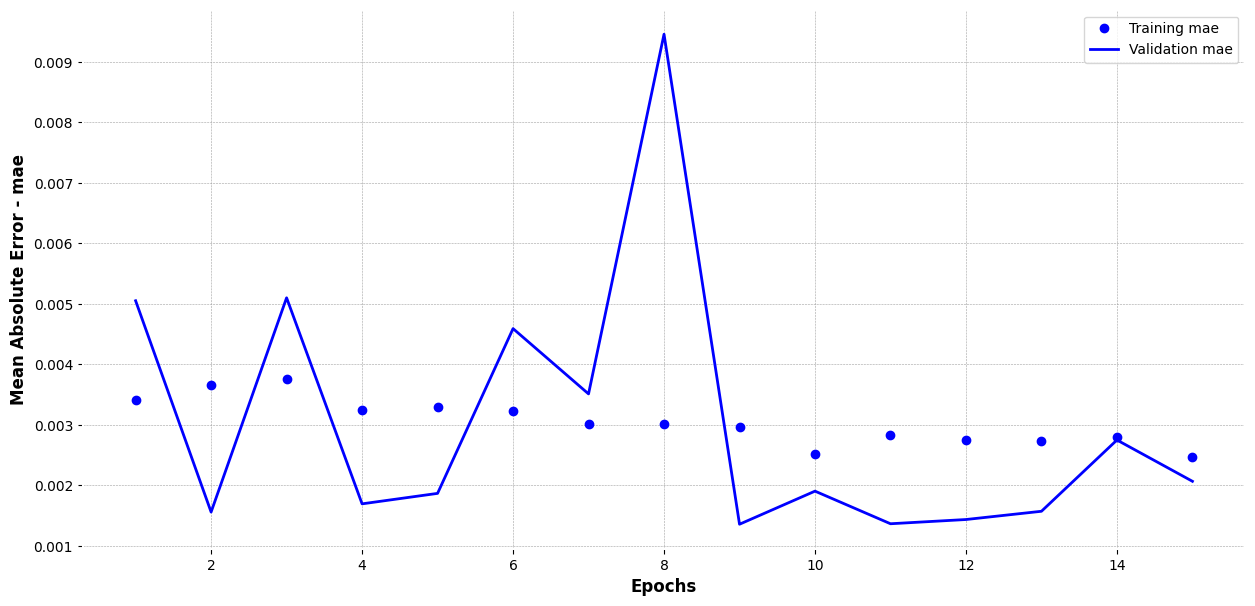

In [307]:
history_dict = history.history

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

In [ ]:
# # Analysis
# # Overall Trend:
# Ideally, we want both lines to decrease and converge as training progresses.
# It means our model is improving in its prediction accuracy on both seen (training) and
# unseen (validation) data.
# # Potential Overfitting:
# A considerable divergence between the training MAE and validation MAE might suggest
# overfitting. Overfitting happens when a model learns the training data too well,
# including its noise and specific details, but fails to generalize to new data.
# # Early Stopping Point:
# Our graph shows a pretty good result. Both training and validation MAE decrease.
# Moreover, they are relatively close to each other, which means our model is robust.
# If we see the validation MAE start to increase while the training MAE keeps decreasing,
# it might signal it is time to stop training (early stopping) to avoid overfitting.

In [308]:
# Using our model to predict the ask and bid price on Normalized data
normalized_prediction = model.predict(x_test)
normalized_prediction

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.5038437 ],
       [0.5031527 ],
       [0.49063787],
       ...,
       [0.4573501 ],
       [0.45783758],
       [0.4566956 ]], dtype=float32)

In [ ]:
# Denomalize the results

In [309]:

import pandas as pd

def denormalize_data(normalized_data, min_price, max_price, max_volume, min_volume_Spread, max_volume_Spread, max_volume_Absolute_Spread, min_Spread, max_Spread):

    # Reshape the normalized_data to have 14 columns if it only has 1
    if normalized_data.shape[1] == 1:
        # Assuming the prediction is for 'Y_High_Bid' and 'Y_Low_Ask', you may need to adjust this
        # if your model predicts different targets or only one target.
        normalized_data = normalized_data.reshape(-1, 2) # Reshape to (num_samples, 2)
        normalized_data = pd.DataFrame(normalized_data, columns=['Y_High_Bid', 'Y_Low_Ask']) # Create DataFrame with only the predicted columns
        # Create empty columns for the other features, you'll need to fill these with appropriate values
        missing_cols = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Ask', 'Volume_Bid', 'Volume_Spread', 'Volume_Absolute_Spread', 'Open_Spread', 'High_Spread', 'Low_Spread', 'Close_Spread']
        for col in missing_cols:
            normalized_data[col] = float('nan') # Fill with NaN as a placeholder
    else:
        normalized_data = pd.DataFrame(normalized_data, columns=['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Y_High_Bid', 'Y_Low_Ask', 'Volume_Ask', 'Volume_Bid', 'Volume_Spread', 'Volume_Absolute_Spread', 'Open_Spread', 'High_Spread', 'Low_Spread', 'Close_Spread']) # Assuming this order of columns based on your denormalization logic


    # Create a copy of the normalized data to avoid modifying the original data
    denormalized_data = normalized_data.copy()

    # Denormalize price columns
    price_columns = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Y_High_Bid', 'Y_Low_Ask']
    for column in price_columns:
        denormalized_data[column] = denormalized_data[column] * (max_price - min_price) + min_price

    # Denormalize volume columns
    volume_columns = ['Volume_Ask', 'Volume_Bid']
    for column in volume_columns:
        denormalized_data[column] = denormalized_data[column] * max_volume

    # Denormalize volume spread columns
    denormalized_data['Volume_Spread'] = denormalized_data['Volume_Spread'] * (max_volume_Spread - min_volume_Spread) + min_volume_Spread
    denormalized_data['Volume_Absolute_Spread'] = denormalized_data['Volume_Absolute_Spread'] * max_volume_Absolute_Spread

    # Denormalize spread columns
    spread_columns = ['Open_Spread', 'High_Spread', 'Low_Spread', 'Close_Spread']
    for column in spread_columns:
        denormalized_data[column] = denormalized_data[column] * (max_Spread - min_Spread) + min_Spread

    return denormalized_data

In [310]:
denormalized_pred = denormalize_data(normalized_prediction, min_price, max_price, max_volume, min_volume_Spread, max_volume_Spread, max_volume_Absolute_Spread, min_Spread, max_Spread)

In [311]:
import random

n_rec = random.randint(0, min(x_test.shape[0], y_test.shape[0], denormalized_pred.shape[0]) - 1)

predicted_price = denormalized_pred.iloc[n_rec][['Y_High_Bid', 'Y_Low_Ask']]

# Accessing the corresponding values in y_test based on the denormalized_pred's index
actual_price =data[['Y_High_Bid', 'Y_Low_Ask']].iloc[n_rec]

print("Predicted price: \n",predicted_price,'\n')
print("Actual price: \n", actual_price,'\n')
print("absolute error: \n", predicted_price - actual_price, '\n')
print("% absolute error: \n", (predicted_price - actual_price) / actual_price * 100,"% \n")

Predicted price: 
 Y_High_Bid    22.658491
Y_Low_Ask     22.656866
Name: 2666, dtype: float64 

Actual price: 
 Y_High_Bid    24.119
Y_Low_Ask     24.119
Name: 2666, dtype: float64 

absolute error: 
 Y_High_Bid   -1.460509
Y_Low_Ask    -1.462134
Name: 2666, dtype: float64 

% absolute error: 
 Y_High_Bid   -6.055429
Y_Low_Ask    -6.062166
Name: 2666, dtype: float64 % 



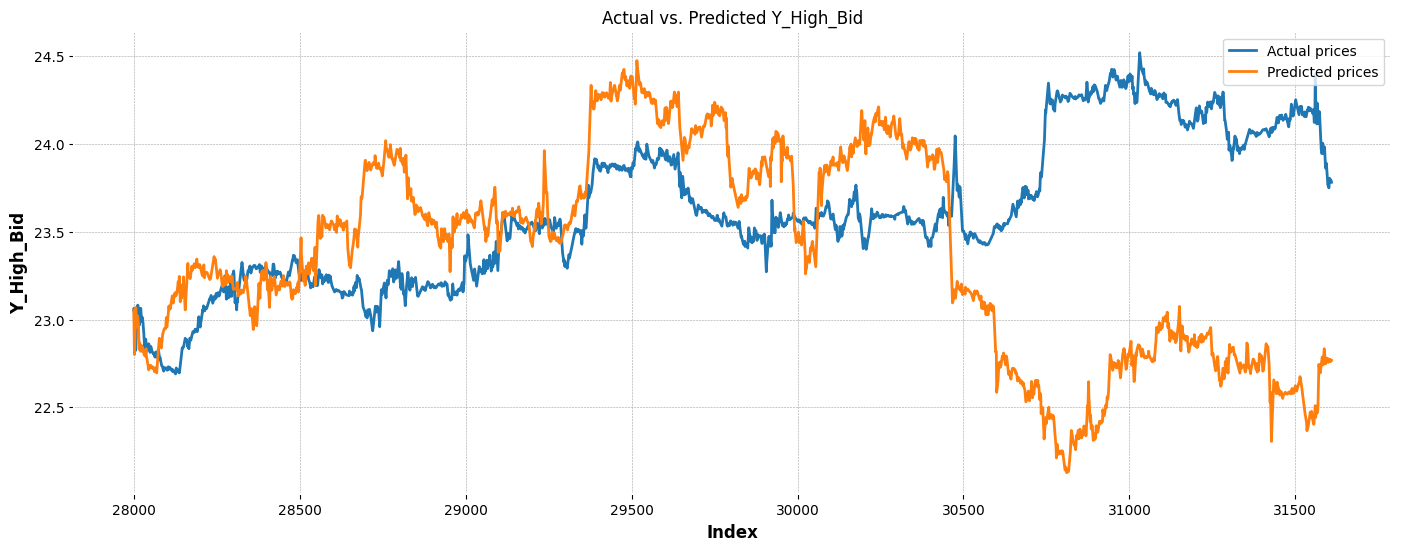

In [304]:
import matplotlib.pyplot as plt

# ... (your denormalization function and other code) ...

fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

# Ensure both datasets have the same number of rows for plotting
num_rows = min(len(y_test), len(denormalized_pred))  # Get the minimum number of rows
x_axis = y_test.index[:num_rows]  # Use index of y_test for x-axis

# Denormalize the actual values in y_test for accurate comparison
# Assuming y_test only contains 'Y_High_Bid', 'Y_Low_Ask' and needs to be denormalized accordingly
# Create a DataFrame with only 'Y_High_Bid', 'Y_Low_Ask' columns from y_test.values
y_test_df = pd.DataFrame(y_test.values, columns=['Y_High_Bid', 'Y_Low_Ask'])

# Call denormalize_data with y_test_df to denormalize only the target columns
denormalized_y_test = denormalize_data(y_test_df, min_price, max_price, max_volume, min_volume_Spread, max_volume_Spread, max_volume_Absolute_Spread, min_Spread, max_Spread)

actual_values = denormalized_y_test['Y_High_Bid'][:num_rows] # Use denormalized y_test
predicted_values = denormalized_pred['Y_High_Bid'][:num_rows]

# Plot actual values
line1, = ax1.plot(x_axis, actual_values, label='Actual prices')

# Plot predicted values
line2, = ax1.plot(x_axis, predicted_values, label='Predicted prices')

plt.legend(loc='upper right')
plt.xlabel('Index')  # Or any other appropriate x-axis label
plt.ylabel('Y_High_Bid')
plt.title('Actual vs. Predicted Y_High_Bid')
plt.show()

Okay, let's analyze your code in comparison to industry best practices.

# Strengths of your code:

**Data Exploration and Visualization:** You have done a good job in exploring the dataset using descriptive statistics, histograms, KDE plots, and scatter plots. This is crucial for understanding the data before building a model.

**Data Cleaning:** You addressed the time issue by converting it to numerical data, identifying weekends, and creating new features to represent new days and weeks. This shows good data preprocessing practice.

**Feature Engineering:** You calculated spreads and absolute spreads, which can be useful features for financial models.

**Data Splitting:** You divided the data into training and testing sets, which is essential for evaluating model performance.

**Normalization:** You carefully normalized the data using min-max scaling, which helps improve model convergence and performance.

**Model Selection:** You chose a multi-layer perceptron (MLP), which is a suitable model for this type of time series prediction task.

**Evaluation:** You used appropriate metrics (MAE and MSE) to evaluate the model and visualized the training history to check for overfitting.

# Areas for improvement:

**Code Organization:** Consider organizing the code into functions or classes to improve readability and reusability. You could create separate functions for data loading, preprocessing, model building, and evaluation.

**Comments and Documentation:** Adding more comments and documentation to your code would make it easier for others (and your future self) to understand the code's logic and purpose.

**Data Leakage:** Double-check for potential data leakage in your normalization process. Make sure that normalization parameters are derived only from the training set and applied to the test set.

**Model Tuning:** Experiment with different model architectures, hyperparameters, and optimization algorithms to find the best configuration for your data. You could use techniques like grid search or random search for hyperparameter optimization.

**Error Handling:** Consider adding error handling to your code to handle potential exceptions or unexpected inputs.

**Cross-Validation:** Implement cross-validation to get a more robust estimate of model performance.

**Feature Importance:** Analyze feature importance to understand which features are most influential in the model's predictions. This can help with feature selection and model improvement.

**Modularity:** Consider structuring your code with more modularity and separation of concerns. For example, you could have a data loading module, a preprocessing module, a modeling module, and an evaluation module.

# Overall:

Your code demonstrates a good understanding of the fundamental steps involved in building a machine learning model for financial time series prediction. By incorporating some of the suggested improvements, you can further enhance the code's quality, readability, and maintainability, bringing it closer to industry best practices. I hope this analysis is helpful! Let me know if you have any other questions.